<a href="https://colab.research.google.com/github/theidari/alphabet_soup/blob/main/src/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Alphabet Soup Charity Optimization**

#**Step 3: Optimize the Model**
---

In [1]:
# Delete the existing directory
!rm -rf alphabet_soup

# Clone the repository to a new directory
!git clone https://github.com/theidari/alphabet_soup.git

# Dependencies and setup
from alphabet_soup.src.package.constants import * # constants
from alphabet_soup.src.package.helpers import * # liberaries and functions

Cloning into 'alphabet_soup'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 197 (delta 138), reused 10 (delta 5), pack-reused 0
Receiving objects: 100% (197/197), 51.77 KiB | 12.94 MiB/s, done.
Resolving deltas: 100% (138/138), done.
☑ constants is imporetd
☑ helpers is imporetd


In [2]:
# Loading the data into a Pandas DataFrame
application_df = pd.read_csv(DATA_URL)

In [3]:
# Drop the 'EIN' column.
application_df = application_df.drop(columns=["EIN"], axis=1)

In [4]:
binning (application_df,'CLASSIFICATION',800)


--------------------------------------------------------------------------------
 Value Count before binning:
--------------------------------------------------------------------------------
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64
--------------------------------------------------------------------------------
Value Count after binning:
--------------------------------------------------------------------------------
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64


In [5]:
binning (application_df,'APPLICATION_TYPE',500)


--------------------------------------------------------------------------------
 Value Count before binning:
--------------------------------------------------------------------------------
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64
--------------------------------------------------------------------------------
Value Count after binning:
--------------------------------------------------------------------------------
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64


In [6]:
binning (application_df,'NAME',100)


--------------------------------------------------------------------------------
 Value Count before binning:
--------------------------------------------------------------------------------
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR              

In [7]:
# Convert categorical data to numeric with `pd.get_dummies`
application_numeric = pd.get_dummies(application_df)

In [8]:
# Split our preprocessed data into our features and target arrays
X = application_numeric.drop(['IS_SUCCESSFUL'], axis=1)
y = application_numeric['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

input_features=len(X_train_scaled[1])

In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer and Compile the model 
as_model=as_model_func([80,80,50,100,50,10],input_features,"relu")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                6000      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 50)                4050      
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [10]:
fit_model = as_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 5s 3ms/step - loss: 0.5106 - accuracy: 0.7482
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4929 - accuracy: 0.7582
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4891 - accuracy: 0.7598
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4876 - accuracy: 0.7603
Epoch 5/100
804/804 [==============================] - 4s 5ms/step - loss: 0.4864 - accuracy: 0.7626
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4850 - accuracy: 0.7616
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4842 - accuracy: 0.7636
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4832 - accuracy: 0.7627
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4817 - accuracy: 0.7637
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.4817 - accura

In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = as_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5548 - accuracy: 0.7479 - 617ms/epoch - 2ms/step
Loss: 0.5548407435417175, Accuracy: 0.7478716969490051


<Axes: title={'center': 'Training Accuracy'}>

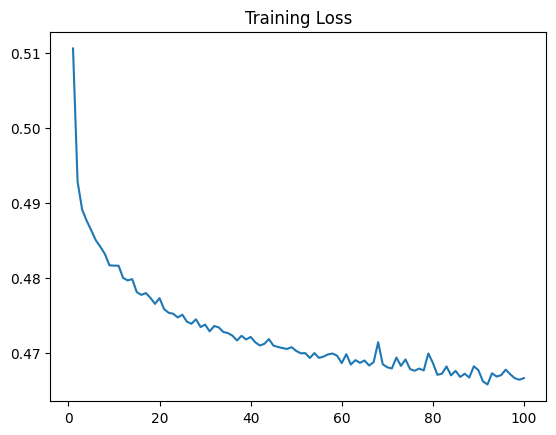

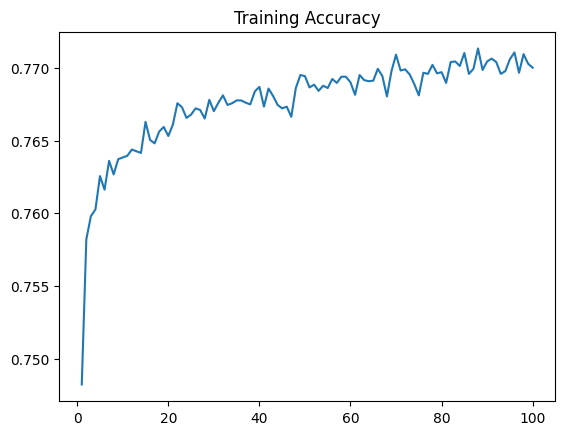

In [12]:
# Export our model to HDF5 file
# Create a DataFrame containing training history
hist = pd.DataFrame(fit_model.history)
hist.index += 1
# Plot the accuracy
hist.plot(y="loss", title='Training Loss', legend=False)
hist.plot(y='accuracy', title='Training Accuracy', legend=False)